## Práctica 2. Introducción a ggplot

En clase hemos tenido una breve introducción al paquete ggplot, el cual estaremos utilizando muy activamente en el curso.

Par reforzar los conceptos, en esta práctica se presentan pequeños snippets explorando el dataframe `iris`.

Para cada segmento de código, debe mostrar el resultado o la gráfica y explicar muy brevemente el código.



  #### 1. Explorar el dataframe


In [3]:
str(iris) #* Str nos dice que tipo de dato es iris y el tipo de datos de sus columnas

head(iris) #! Nos da los datos en forma de tabla junto con el tipo de sus columnas

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


#### 2. Graficar dos variables cuantitativas

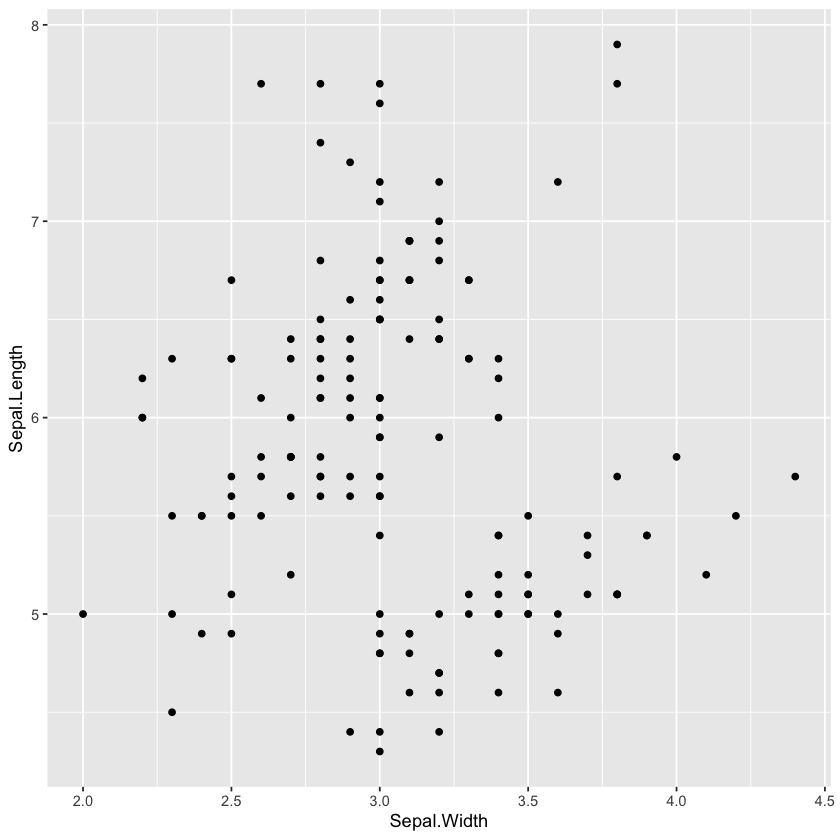

In [4]:
library(ggplot2) #Importas libreria ggplot
#En miGraf invocamos ggplot para que con iris hagamos una grafica que tenga el ancho y largo de sepalo
miGraf<-ggplot(data=iris, aes(x=Sepal.Width,y=Sepal.Length))
miGraf<- miGraf+geom_point() #Aqui indicamos que queremos hacer un scatterplot
miGraf

#### 3. Graficar tres variables - Uso de canales

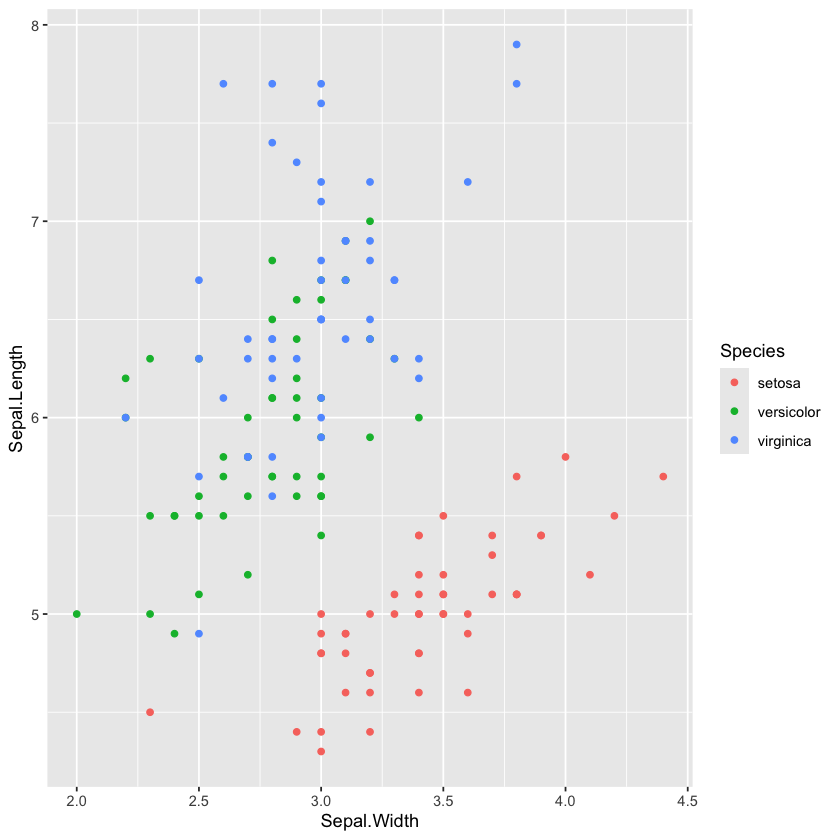

In [5]:
miGraf<-ggplot(data=iris, aes(x=Sepal.Width,y=Sepal.Length, color=Species)) 
miGraf+geom_point()
#La principal diferencia es el parametro color para poder idenfiticar las especies de los sepalos
#Sigue siendo una scatterplot

#### 4. Graficar cuatro variables - Uso de canales

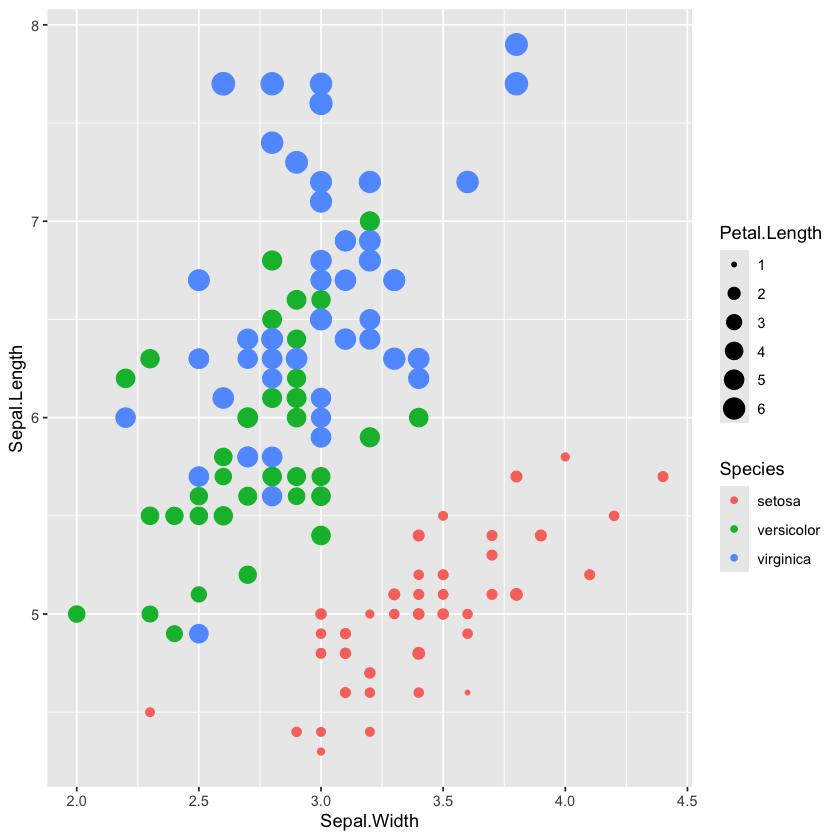

In [6]:
miGraf<-ggplot(data=iris, aes(x=Sepal.Width,y=Sepal.Length, color=Species, size=Petal.Length))
miGraf+geom_point()
#Con el parametro size indicamos que el tamaño sea de el largo de petalo
#En este caso la grafica ya es una bubble plot

#### 5. Graficar cinco variables - Canales y facets

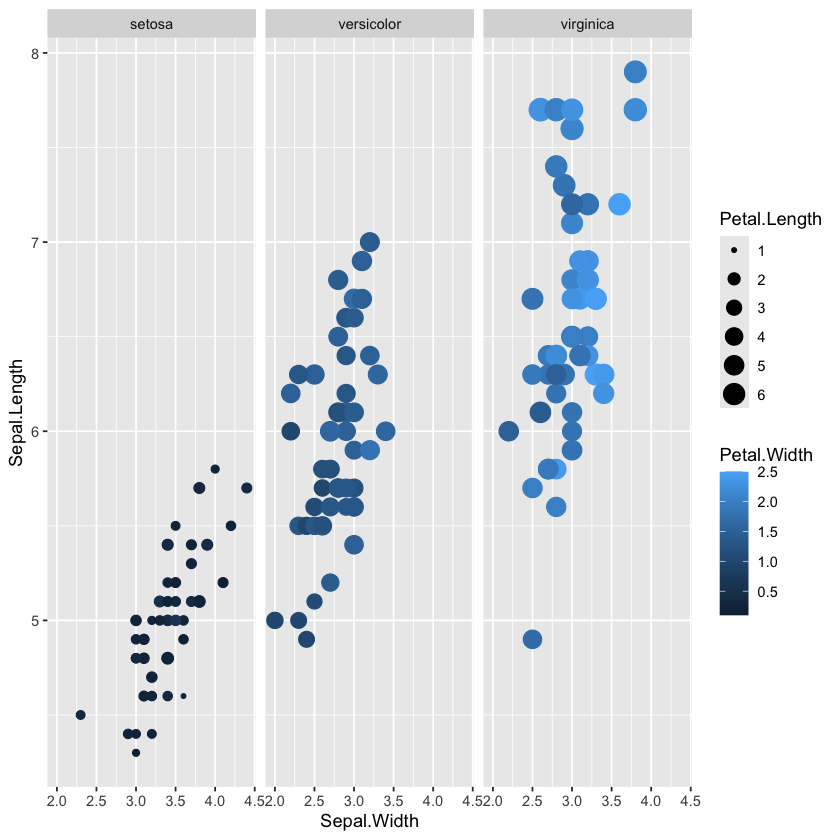

In [7]:
miGraf<-ggplot(data=iris, aes(x=Sepal.Width,y=Sepal.Length, color=Petal.Width, size=Petal.Length))
miGraf+facet_wrap(~Species)+geom_point()
# usas facewrap para asignarle una grafica a cada especie. Cada grafica aparte corresponte a un ancho y largo 


#### 6. Graficar un histograma distinguiendo por especie


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


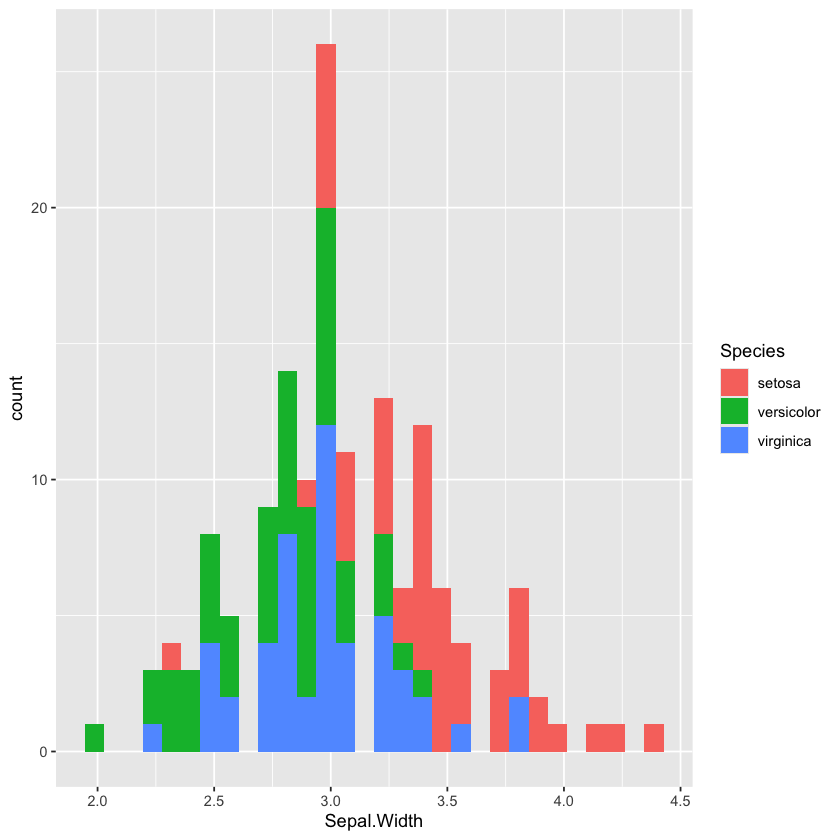

In [8]:
miGraf<-ggplot(data=iris, aes(x=Sepal.Width,fill=Species)) #Aqui queremos contar el ancho de sepales y que su relleno sea por especie
miGraf+geom_histogram() #Indicamos que buscamos crear un histograma

#### 7. Graficar histograma en facetas


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


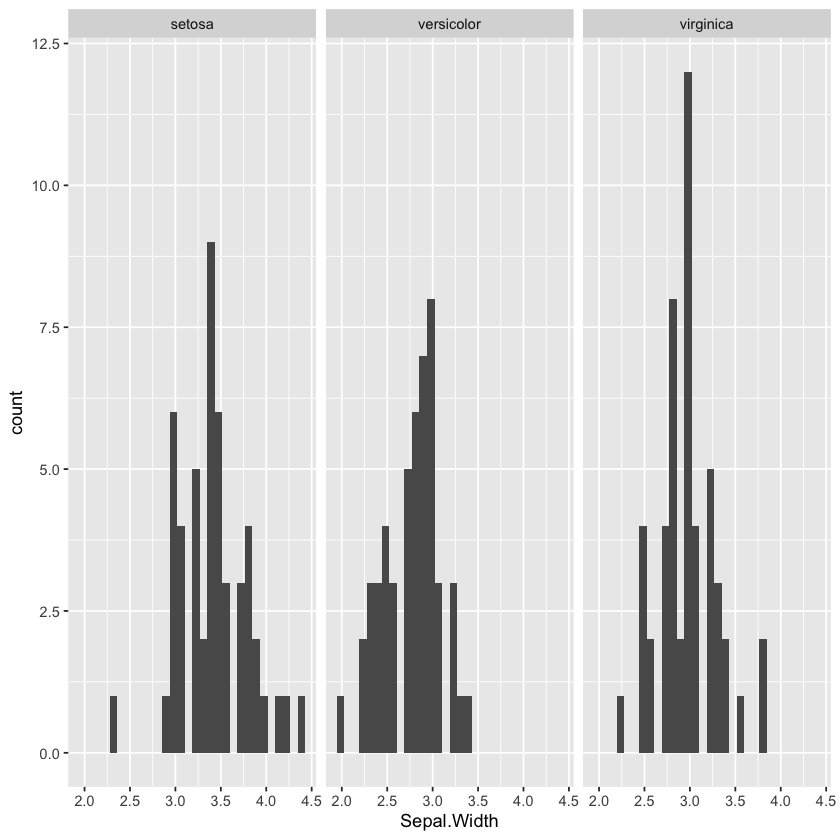

In [9]:
miGraf<-ggplot(data=iris, aes(x=Sepal.Width))
miGraf+facet_wrap(~Species)+geom_histogram() #En este caso hacemos un histograma para cada especie



#### 8. Personalización de la gráfica


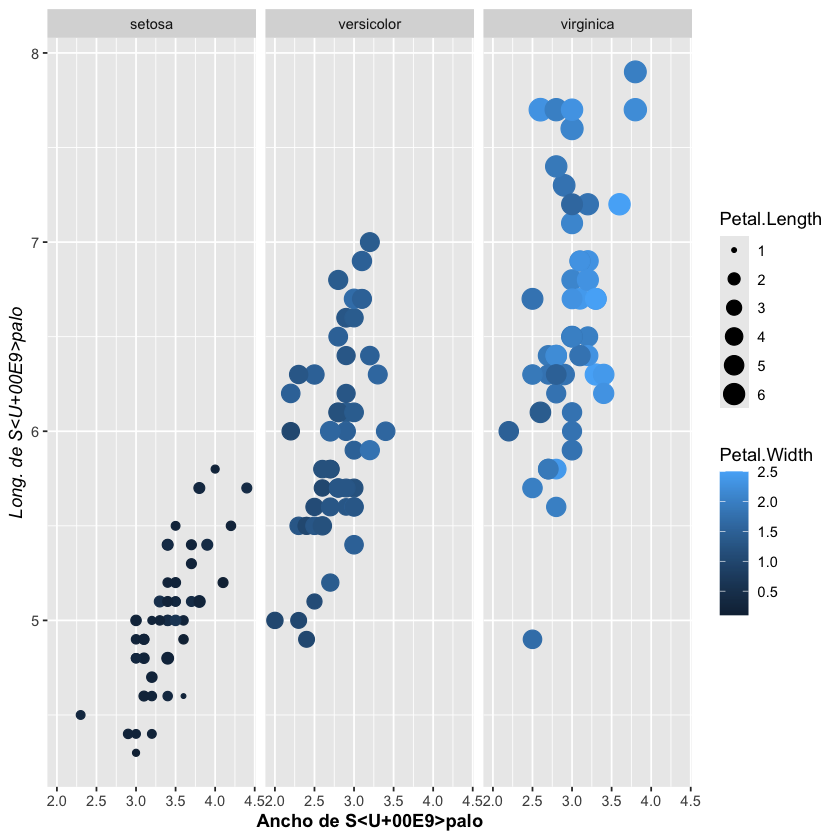

In [10]:
miGraf<-ggplot(data=iris, aes(x=Sepal.Width,y=Sepal.Length, colour=Petal.Width, size=Petal.Length))
miGraf<-miGraf + facet_wrap(~Species)+geom_point()
miGraf<-miGraf + xlab('Ancho de Sépalo')+ylab('Long. de Sépalo') #Aqui ponemos los nombres de las leyendas
miGraf<-miGraf + theme(axis.title.x=element_text(face='bold'))# Indicamos que queremos en negritas eje x
miGraf<-miGraf + theme(axis.title.y=element_text(face='italic')) #Aqui que sea italica
miGraf

#### 9. (Dos puntos)

Explore el dataset *movies* y presente las visualizaciones apropiadas para responder alguna pregunta interesante, como ¿En qué época se filmaron las películas con la peor calificación, a qué categoría pertenecen? ¿Cuáles son consideradas las mejores y las peores películas?




#### 10. Gráfica logarítmica (dos puntos)

En la introducción a ggplot2, desplegamos una gráfica del peso de los diamantes contra su precio. El siguiente comando, más compacto, permite desplegar la gráfica:



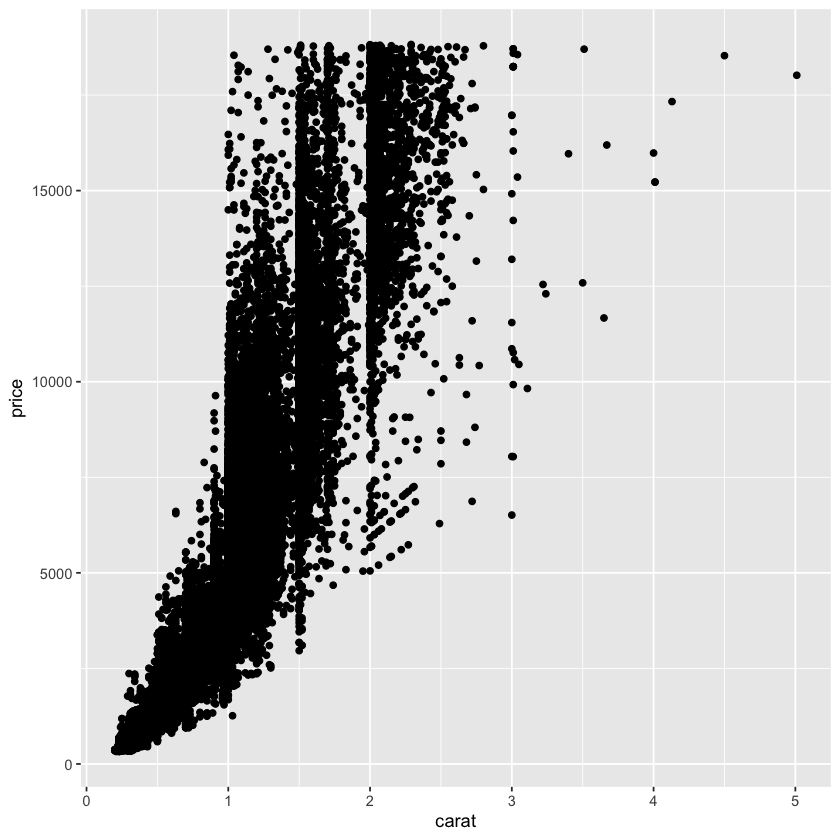

In [11]:
ggplot(diamonds,aes(x=carat,y=price))+geom_point()

`geom_smooth()` using formula = 'y ~ x'


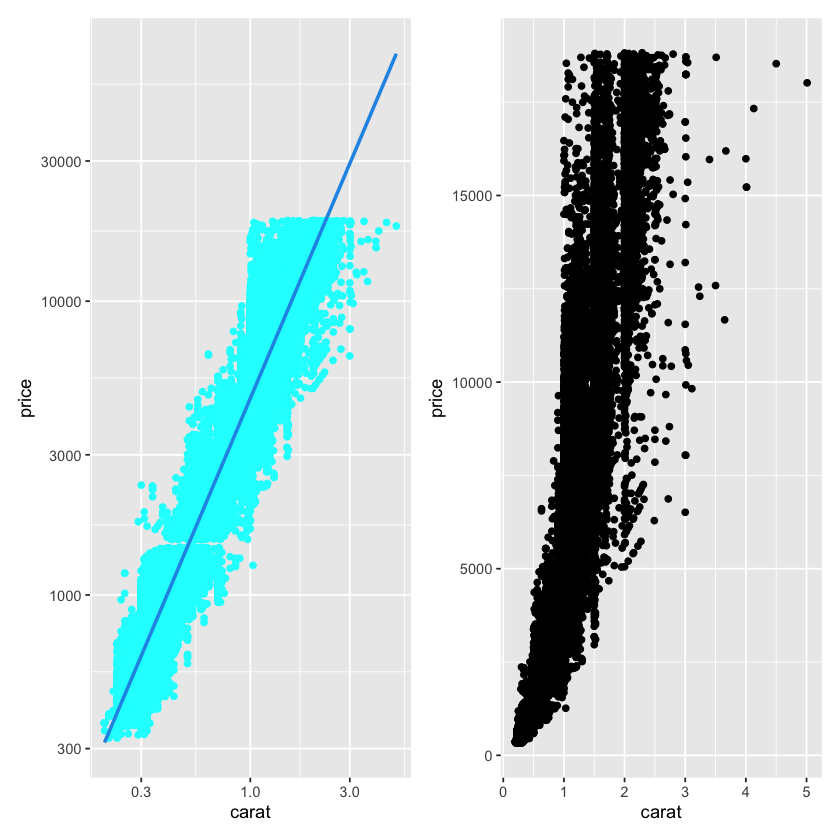

In [12]:
library(patchwork)

#! Grafica logaritmica 
plt1 <- ggplot(diamonds, aes(x = carat, y = price)) +
    geom_point(color = "cyan1") +
    scale_x_continuous(trans = "log10") +
    scale_y_continuous(trans = "log10") +
    geom_smooth(method = "lm", color = "68")

plt2 <- ggplot(diamonds, aes(x = carat, y = price)) +
    geom_point()

combined <- plt1 + plt2

print(combined)


En efecto, se observa una relación exponencial entre el precio y el peso de los diamantes. Para visualizar de mejor manera la correlación entre estas dos variables:

  a) Desplegaremos la gráfica con los dos ejes en escala logarítmica (Ayuda: usa `scale_x_continuous(trans= 'log10', ...`) )
  b) Agregaremos una línea de regresión lineal (Ayuda: `geom_smooth(method='lm')`)
  c) Desplegaremos la gráfica original al lado de la gráfica resultante como se muestra en la figura (Ayuda: usa librería `patchwork`:



![p1+p2](https://drive.google.com/uc?export=view&id=1N0ChkNEScSeIT701_YBVHXAAXgyIWj4t)


Muestre el código del script que ejecuta todos los puntos anteriores.
